<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/Superimport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superimport demo

The [superimport library](https://github.com/probml/superimport), written by [Mahmoud Soliman](https://github.com/mjsML), takes care of installing missing python packages for you. All you have to do is type `pip install superimport` (once per colab session), and then add `import superimport` to the top of any of your python files; then, when you run those files, superimport will read the source code, figure out any missing dependencies, install them for you automagically, and then run the rest of your code as usual. We illustrate this below. 



In [1]:
!pip install superimport -qqq
!pip install deimport -qqq

In [3]:
import superimport


def try_deimport():
    try:
        from deimport.deimport import deimport

        deimport(superimport, verbose=False)
    except Exception as e:
        print(e)

# An example with PgmPy

Colab has most popular ML packages already installed. However, there are a few missing ones, such as [PgmPy](https://github.com/pgmpy/pgmpy). Below we create a short file, called `test.py`, that relies on that missing library. We then show what happens if we try to run the script  without first installing the library. 

In [4]:
%%file test.py
import pgmpy
import numpy
import matplotlib
print('pgmpy ', pgmpy.__version__)

Writing test.py


Without importing superimport, if you have a missing package your script will fail.

In [5]:
%run test.py

ModuleNotFoundError: ignored



Now we add one new line to our file: `import superimport`

In [6]:
%%file test.py
import superimport
import pgmpy
import numpy
import matplotlib
print('pgmpy ', pgmpy.__version__)


Overwriting test.py


We can now successfully the script, and it will install any missing packages.


Note, however, that we have to deimport the `superimport` symbol before running any code that uses superimport, to force the package to be reloaded (and hence re-executed), otherwise colab will use the cached version (if available) of superimport, which may be stale. 

In [7]:
try_deimport()
%run -n test.py

ERROR: superimport : missing python module: pgmpy 
Trying try to install automatcially


pgmpy  0.1.15


# An example with NumPyro

This time we make a demo that uses numpyro, that is not installed in colab by default.

In [8]:
%%file test.py
import superimport
import numpyro
print('numpyro version ', numpyro.__version__)

Overwriting test.py


In [9]:

try_deimport()
%run -n test.py

ERROR: superimport : missing python module: numpyro 
Trying try to install automatcially


numpyro version  0.7.2


# An example with Pyro

This time we make a demo that uses pyro, that is not installed in colab by default. Furthermore, its package name (pyro-ppl) does not match its import name (pyro).

In [10]:
%%file test.py
import superimport
import pyro
print('pyro version ', pyro.__version__)

Overwriting test.py


In [11]:

try_deimport()
%run -n test.py

ERROR: superimport : missing python module: pyro 
Trying try to install automatcially


pyro version  1.7.0


# An example from the book

In [12]:
!git clone --depth 1 https://github.com/probml/pyprobml  /pyprobml &> /dev/null
%cd -q /pyprobml/scripts

saving image to /pyprobml/scripts/../figures/linregResidualsNoBars.pdf


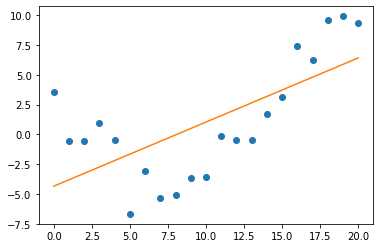

saving image to /pyprobml/scripts/../figures/linregResidualsBars.pdf


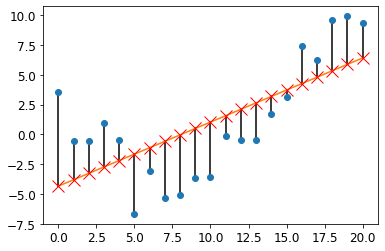

In [13]:

try_deimport()
%run -n linreg_residuals_plot.py

saving image to /pyprobml/scripts/../figures/polyfitVsDegree.pdf


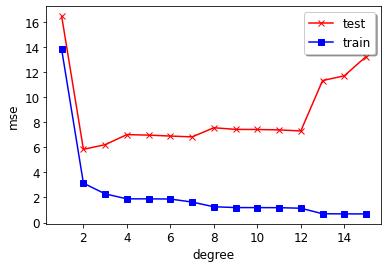

saving image to /pyprobml/scripts/../figures/polyfitDegree20.pdf


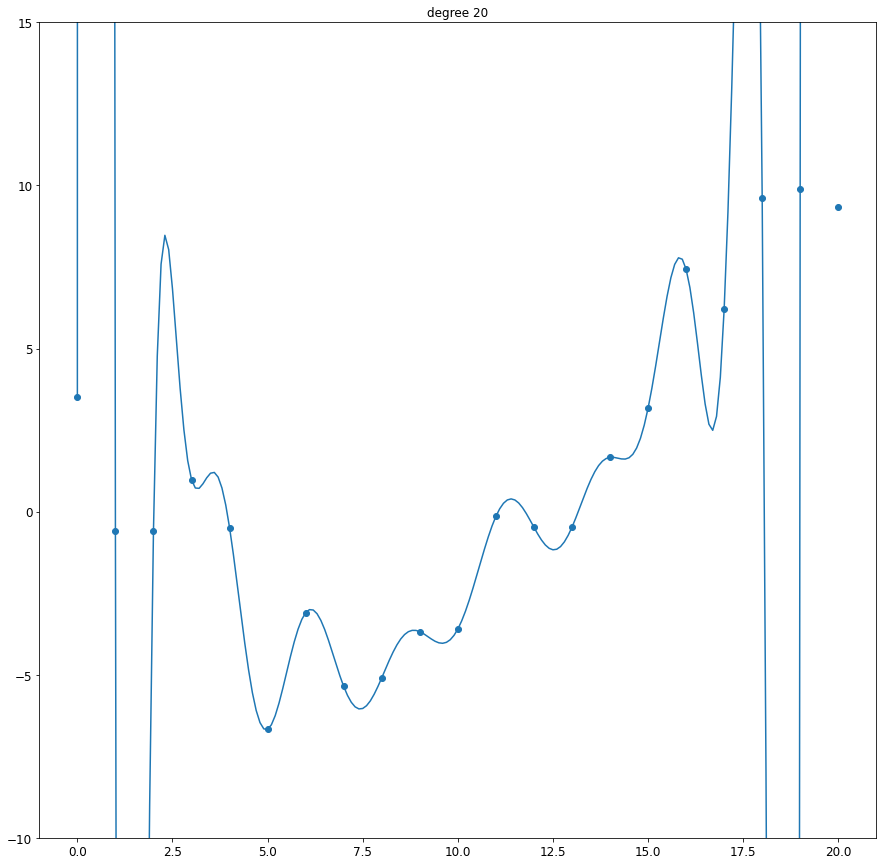

saving image to /pyprobml/scripts/../figures/polyfitDegree20Residuals.pdf


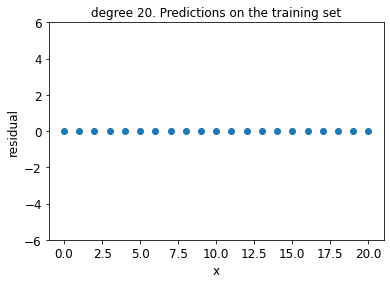

saving image to /pyprobml/scripts/../figures/polyfitDegree20FitVsActualTrain.pdf


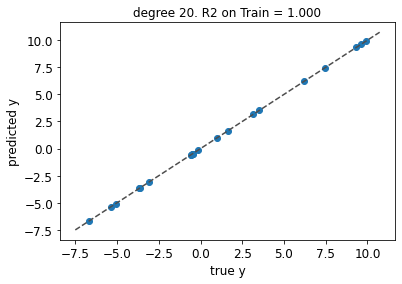

saving image to /pyprobml/scripts/../figures/polyfitDegree20FitVsActualTest.pdf


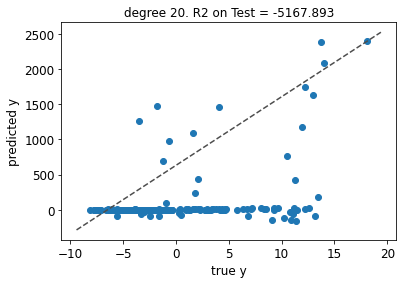

In [16]:

try_deimport()
%run -n linreg_poly_vs_degree.py

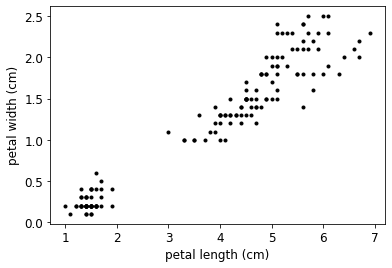

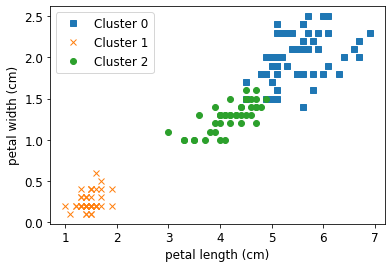

In [17]:

try_deimport()
%run -n iris_kmeans.py

# Sharp edges

* There are some packages whose install names differ from their import names  (eg we type `pip install pyro-ppl` but `import pyro`). There is a [public mapping file](https://github.com/bndr/pipreqs/blob/master/pipreqs/mapping) stored by pipreqs. However, this is missing some entries (such as pyro).  These must be manually added to the [mapping2 file](https://github.com/probml/superimport/blob/main/superimport/mapping2). If your favorite package is missing, open a PR on the superimport repo.

* There are some packages that do not list of all of their requirements.txt (eg GPyOpt depends on matplotlib, but does not mention this). If this 'hidden requirement' is missing, superimport cannot find it either. If it is not already installed in colab, then your script will fail, even with superimport.